# Drug Consumption: Mais Testes com Classificadores

In [207]:
import pandas as pd
import utils as ut

from importlib import reload

reload(ut)

<module 'utils' from '/home/ngmonteiro/llm_experiments/ufes/2024-1-P1-Drug-Consumption/utils.py'>

In [208]:
data = pd.read_csv("data/drug_consumption_preprocessed.csv", index_col="ID")
pd.set_option("display.max_columns", None)

# Executa as filtragens feitas no notebook "classification.ipynb"
X, y = ut.build_dataset(data)

# Coloque "True" se quiser rodar os experimentos ao invés de carregar resultados anteriores.
run = True

ut.create_dirs()

# Observações e Mini-Experimentos

### Análise somente com métricas de personalidade
Tentamos descobrir as relações entre as métricas e as substâncias, de forma que outras características sejam ocultas.

In [209]:
t = 2


def metrics_run():
    x_ = X[ut.numCols]
    labels = y.applymap(ut.threshold, t=[t])
    return ut.test_classifiers(x_, labels)


results_metrics, cm_metrics = ut.run_or_load(
    "results/metrics_{a}.csv", metrics_run if run else None
)

/home/ngmonteiro/llm_experiments/ufes/2024-1-P1-Drug-Consumption/utils.py:325: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.


Substância               Alcohol              Amphet                Amyl  \
                            mean       std      mean       std      mean   
Model                                                                      
BernoulliNB             0.500000  0.000000  0.643972  0.026690  0.500000   
GaussianNB              0.500000  0.000000  0.659512  0.026393  0.504265   
KNeighborsClassifier    0.498711  0.001737  0.624282  0.038862  0.512662   
NearestCentroid         0.607829  0.090498  0.683865  0.028287  0.603280   
RandomForestClassifier  0.499908  0.000504  0.616812  0.031899  0.506429   

Substância                          Benzos                Caff            \
                             std      mean       std      mean       std   
Model                                                                      
BernoulliNB             0.000000  0.652451  0.025836  0.500000  0.000000   
GaussianNB              0.015266  0.651360  0.041448  0.500000  0.000000   
KNeighborsClassifier    0.022576  0.619141  0.032074  0.500000  0.000000   
NearestCentroid         0.044163  0.672401  0.041934  0.654287  0.121973   
RandomForestClassifier  0.016913  0.632993  0.030528  0.500000  0.000000   

Substância              Cannabis                Choc                Coke  \
                            mean       std      mean       std      mean   
Model                                                                      
BernoulliNB             0.698756  0.044841  0.500000  0.000000  0.631010   
GaussianNB              0.720192  0.037835  0.500000  0.000000  0.643711   
KNeighborsClassifier    0.683424  0.037389  0.500000  0.000000  0.597888   
NearestCentroid         0.722342  0.027187  0.462162  0.132541  0.665518   
RandomForestClassifier  0.699983  0.032814  0.500000  0.000000  0.608041   

Substância                           Crack             Ecstasy            \
                             std      mean       std      mean       std   
Model                                                                      
BernoulliNB             0.030302  0.499742  0.002311  0.681015  0.032200   
GaussianNB              0.028386  0.530707  0.029081  0.690556  0.023424   
KNeighborsClassifier    0.029323  0.504047  0.018314  0.656846  0.028268   
NearestCentroid         0.032315  0.657187  0.057562  0.701464  0.031261   
RandomForestClassifier  0.035950  0.504994  0.014904  0.671293  0.031834   

Substância                Heroin            Ketamine                 LSD  \
                            mean       std      mean       std      mean   
Model                                                                      
BernoulliNB             0.567838  0.055156  0.571770  0.027456  0.650468   
GaussianNB              0.598430  0.044420  0.574083  0.037973  0.684419   
KNeighborsClassifier    0.530583  0.030899  0.538222  0.035737  0.631001   
NearestCentroid         0.685205  0.062198  0.644176  0.050801  0.704695   
RandomForestClassifier  0.514035  0.022746  0.519262  0.023892  0.656828   

Substância                          Legalh                Meth            \
                             std      mean       std      mean       std   
Model                                                                      
BernoulliNB             0.033907  0.699229  0.022809  0.604855  0.047560   
GaussianNB              0.042827  0.714395  0.023906  0.621593  0.030561   
KNeighborsClassifier    0.037556  0.670469  0.028168  0.571403  0.026834   
NearestCentroid         0.045265  0.713854  0.028262  0.678981  0.036843   
RandomForestClassifier  0.033781  0.693697  0.033363  0.546474  0.029932   

Substância             Mushrooms            Nicotine                 VSA  \
                            mean       std      mean       std      mean   
Model                                                                      
BernoulliNB             0.669533  0.033229  0.634629  0.031107  0.547211   
GaussianNB              0.686023  0.038786

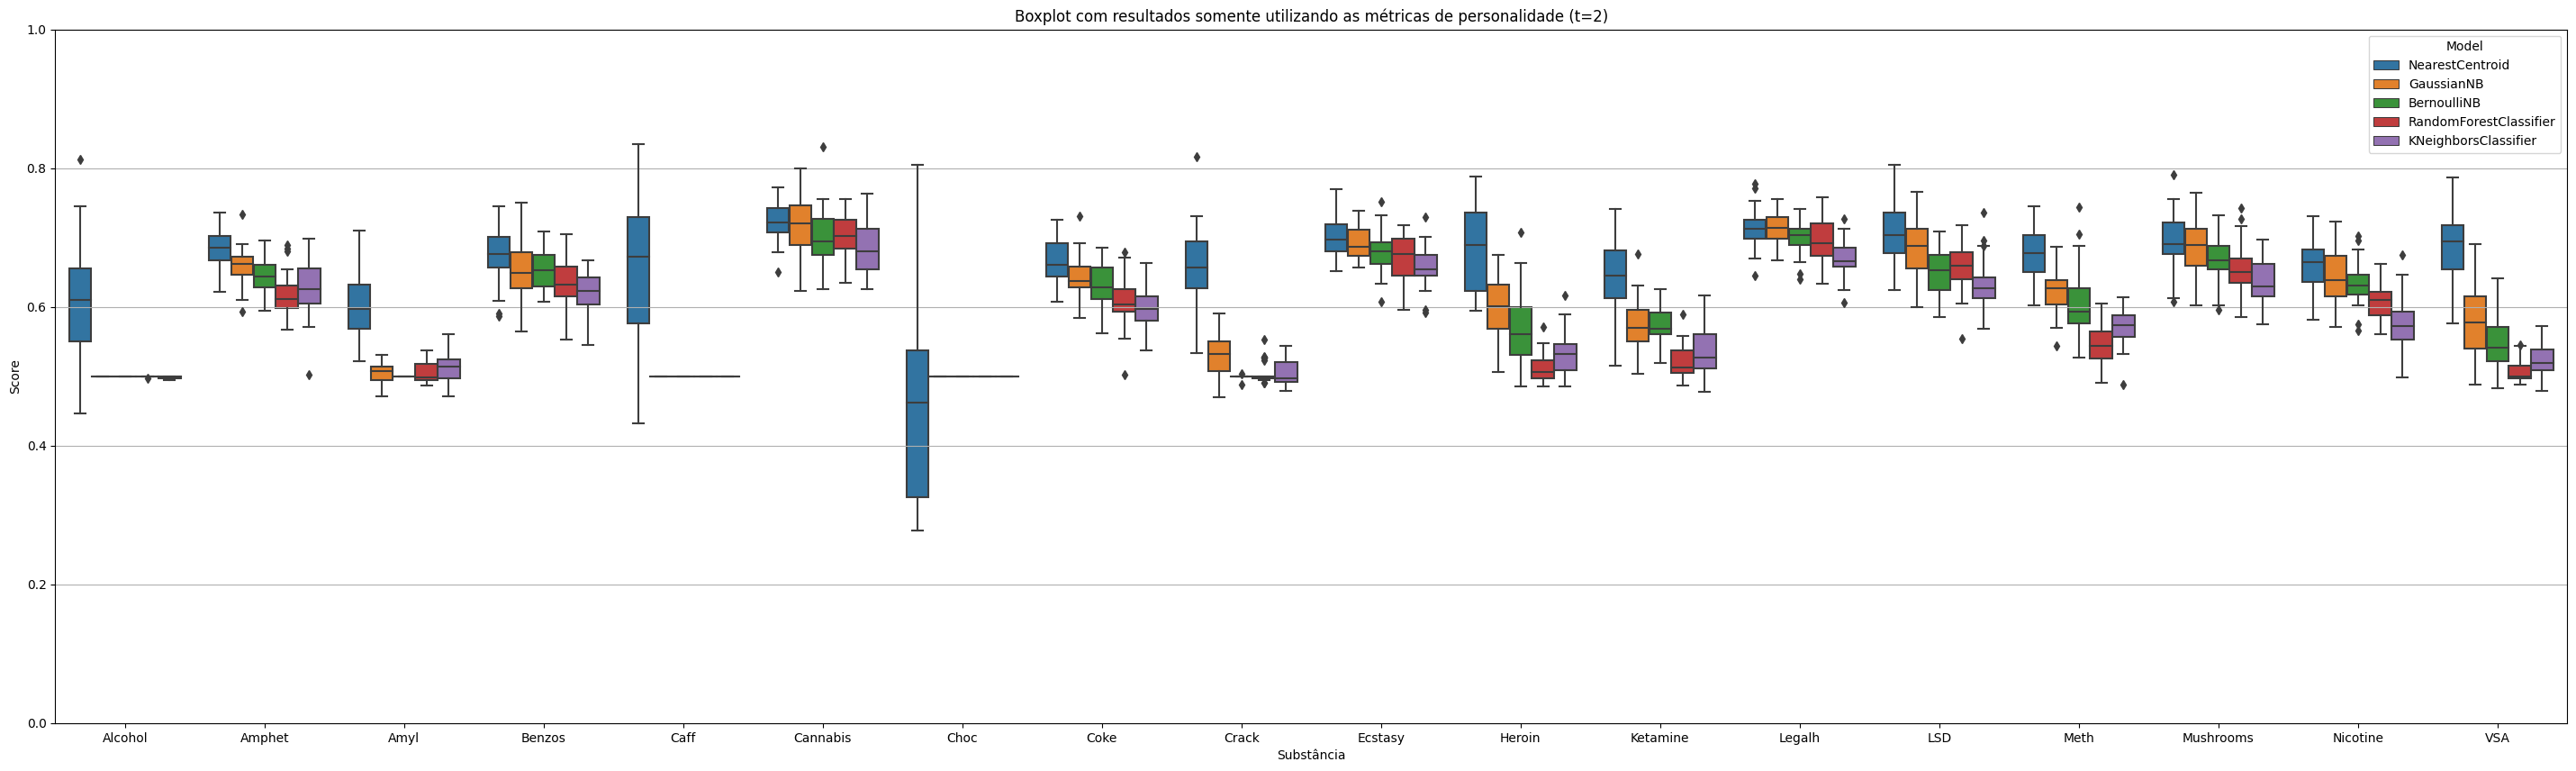

In [210]:
fig = ut.boxplot(
    results_metrics,
    title=f"Boxplot com resultados somente utilizando as métricas de personalidade (t={t})",
    lims=(0, 1),
    refs=None,
)
ut.show_statistics(results_metrics)

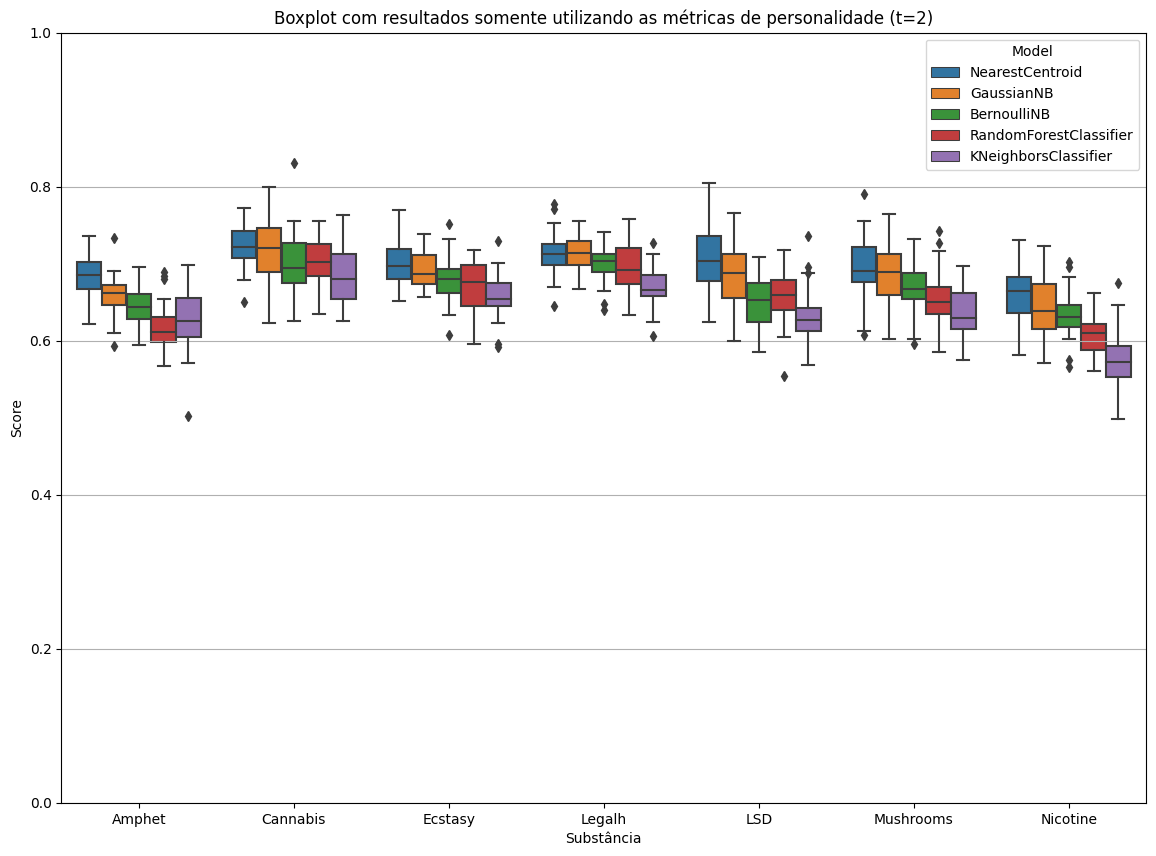

In [211]:
fig = ut.boxplot(
    results_metrics,
    title=f"Boxplot com resultados somente utilizando as métricas de personalidade (t={t})",
    substance_filter=ut.best_k,
)
fig.savefig("figures/metrics.svg")

#### Confusion Matrices

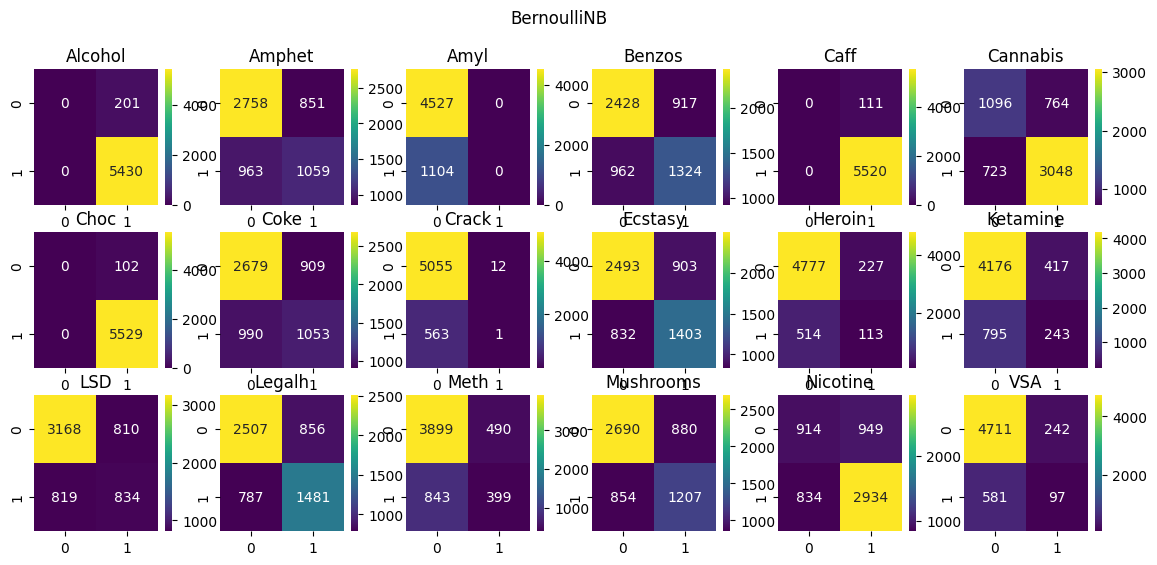

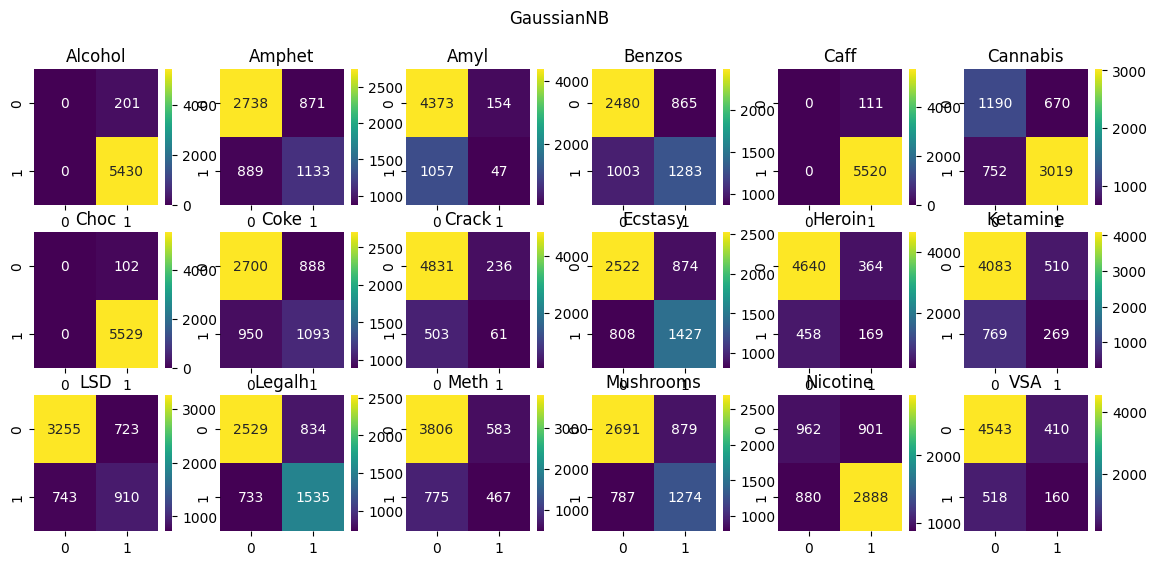

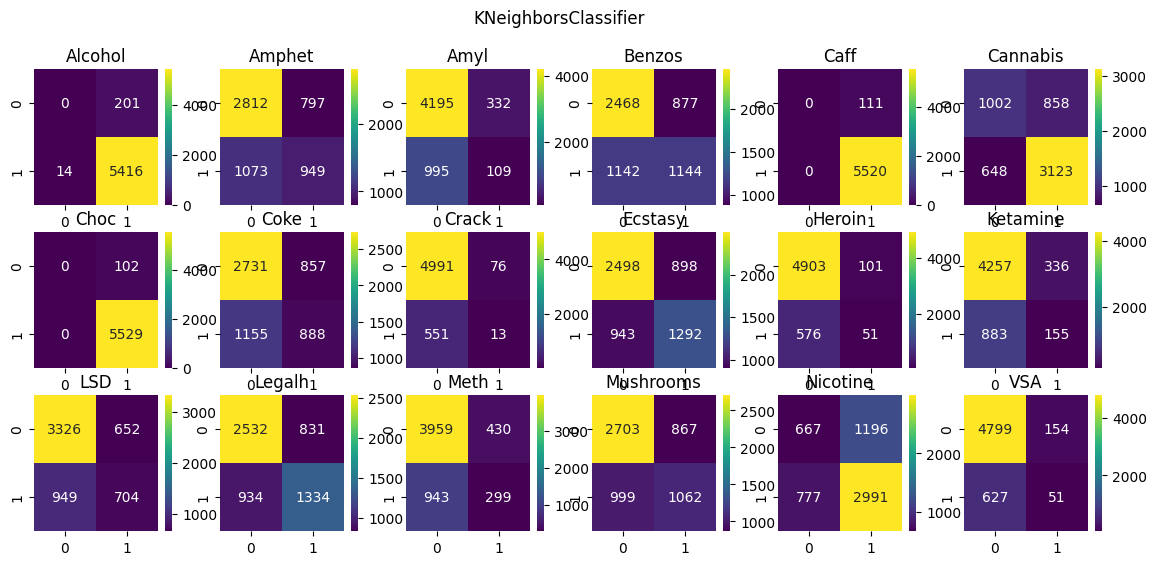

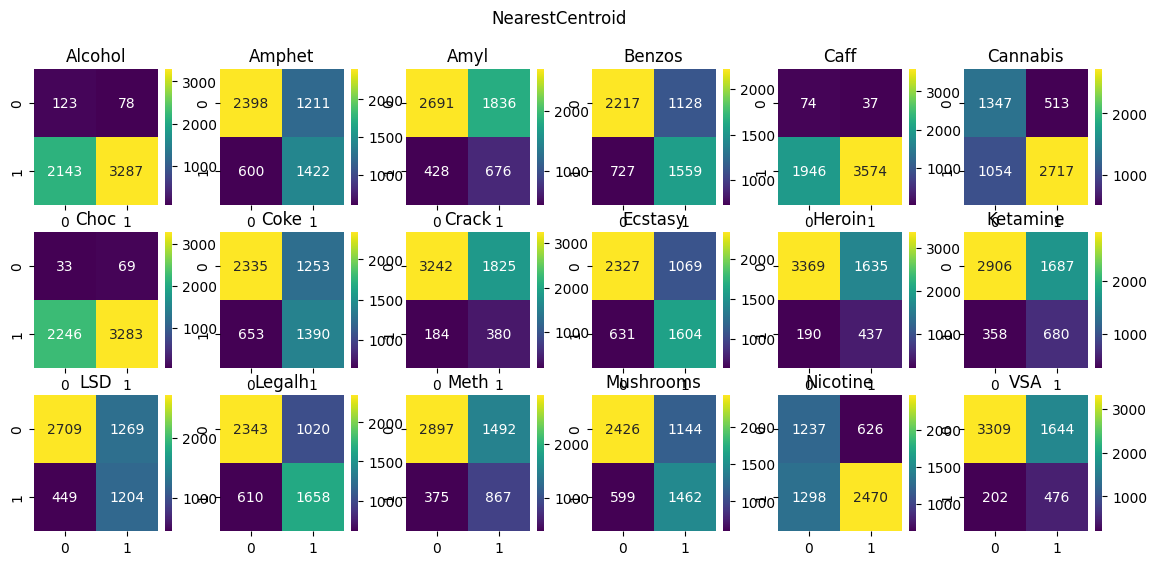

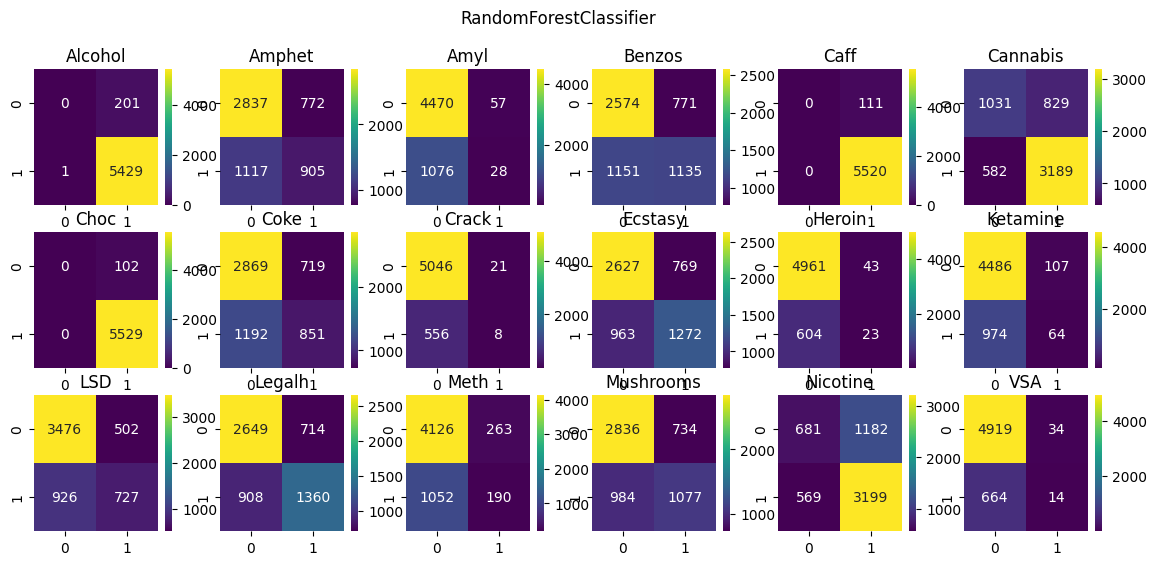

In [212]:
ut.confusion(cm_metrics)

### Análise em um range de idades
Tentamos classificar somente com dados de indívíduos entre 18 a 34 anos. Isso possibilitaria determinar um threshold menor de tempo de uso de uma substância (no último mês, por exemplo).

In [213]:
t = 3


def age_range_run():
    mask = X["Age"] < 2
    x_ = X[mask]
    labels = y[mask].applymap(ut.threshold, t=[t])
    return ut.test_classifiers(x_.drop(columns=["Age"]), labels)


results_age_range, cm_age_range = ut.run_or_load(
    "results/age_range_{a}.csv", age_range_run if run else None
)

/home/ngmonteiro/llm_experiments/ufes/2024-1-P1-Drug-Consumption/utils.py:325: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.


Substância               Alcohol              Amphet                Amyl  \
                            mean       std      mean       std      mean   
Model                                                                      
BernoulliNB             0.500000  0.000000  0.669236  0.050229  0.500000   
GaussianNB              0.499528  0.001439  0.657388  0.057250  0.499833   
KNeighborsClassifier    0.498748  0.002442  0.609183  0.047768  0.506567   
NearestCentroid         0.552156  0.108089  0.686573  0.045143  0.588590   
RandomForestClassifier  0.500000  0.000000  0.601051  0.056188  0.500557   

Substância                          Benzos                Caff            \
                             std      mean       std      mean       std   
Model                                                                      
BernoulliNB             0.000000  0.595926  0.046091  0.500000  0.000000   
GaussianNB              0.000913  0.619598  0.036442  0.497242  0.002859   
KNeighborsClassifier    0.019489  0.585420  0.044327  0.500000  0.000000   
NearestCentroid         0.063560  0.642696  0.050440  0.652645  0.144597   
RandomForestClassifier  0.008097  0.582272  0.041747  0.500000  0.000000   

Substância              Cannabis                Choc                Coke  \
                            mean       std      mean       std      mean   
Model                                                                      
BernoulliNB             0.738815  0.047881  0.500000  0.000000  0.588152   
GaussianNB              0.768554  0.039416  0.499847  0.000837  0.614285   
KNeighborsClassifier    0.736376  0.044976  0.500000  0.000000  0.584082   
NearestCentroid         0.747311  0.044349  0.403693  0.122688  0.633724   
RandomForestClassifier  0.742817  0.036569  0.499696  0.001159  0.572145   

Substância                           Crack             Ecstasy            \
                             std      mean       std      mean       std   
Model                                                                      
BernoulliNB             0.050096  0.518519  0.044248  0.655336  0.042943   
GaussianNB              0.059141  0.550807  0.066984  0.661840  0.040130   
KNeighborsClassifier    0.036545  0.499465  0.013737  0.613640  0.051253   
NearestCentroid         0.061379  0.684259  0.110732  0.661150  0.046625   
RandomForestClassifier  0.036475  0.502149  0.015469  0.616399  0.042001   

Substância                Heroin            Ketamine                 LSD  \
                            mean       std      mean       std      mean   
Model                                                                      
BernoulliNB             0.518652  0.037805  0.523272  0.035226  0.656561   
GaussianNB              0.556041  0.045786  0.537644  0.041550  0.660347   
KNeighborsClassifier    0.517963  0.028142  0.523507  0.037534  0.591460   
NearestCentroid         0.680515  0.079730  0.615898  0.046998  0.677639   
RandomForestClassifier  0.510048  0.021461  0.505576  0.016522  0.619447   

Substância                          Legalh                Meth            \
                             std      mean       std      mean       std   
Model                                                                      
BernoulliNB             0.043665  0.705251  0.033937  0.586552  0.035425   
GaussianNB              0.034952  0.711514  0.040109  0.616638  0.053626   
KNeighborsClassifier    0.040849  0.663548  0.042963  0.573441  0.032230   
NearestCentroid         0.036685  0.703407  0.032632  0.659794  0.052143   
RandomForestClassifier  0.053696  0.680575  0.052097  0.557859  0.028545   

Substância             Mushrooms            Nicotine                 VSA  \
                            mean       std      mean       std      mean   
Model                                                                      
BernoulliNB             0.658971  0.055146  0.666725  0.055179  0.500719   
GaussianNB              0.667113  0.048549

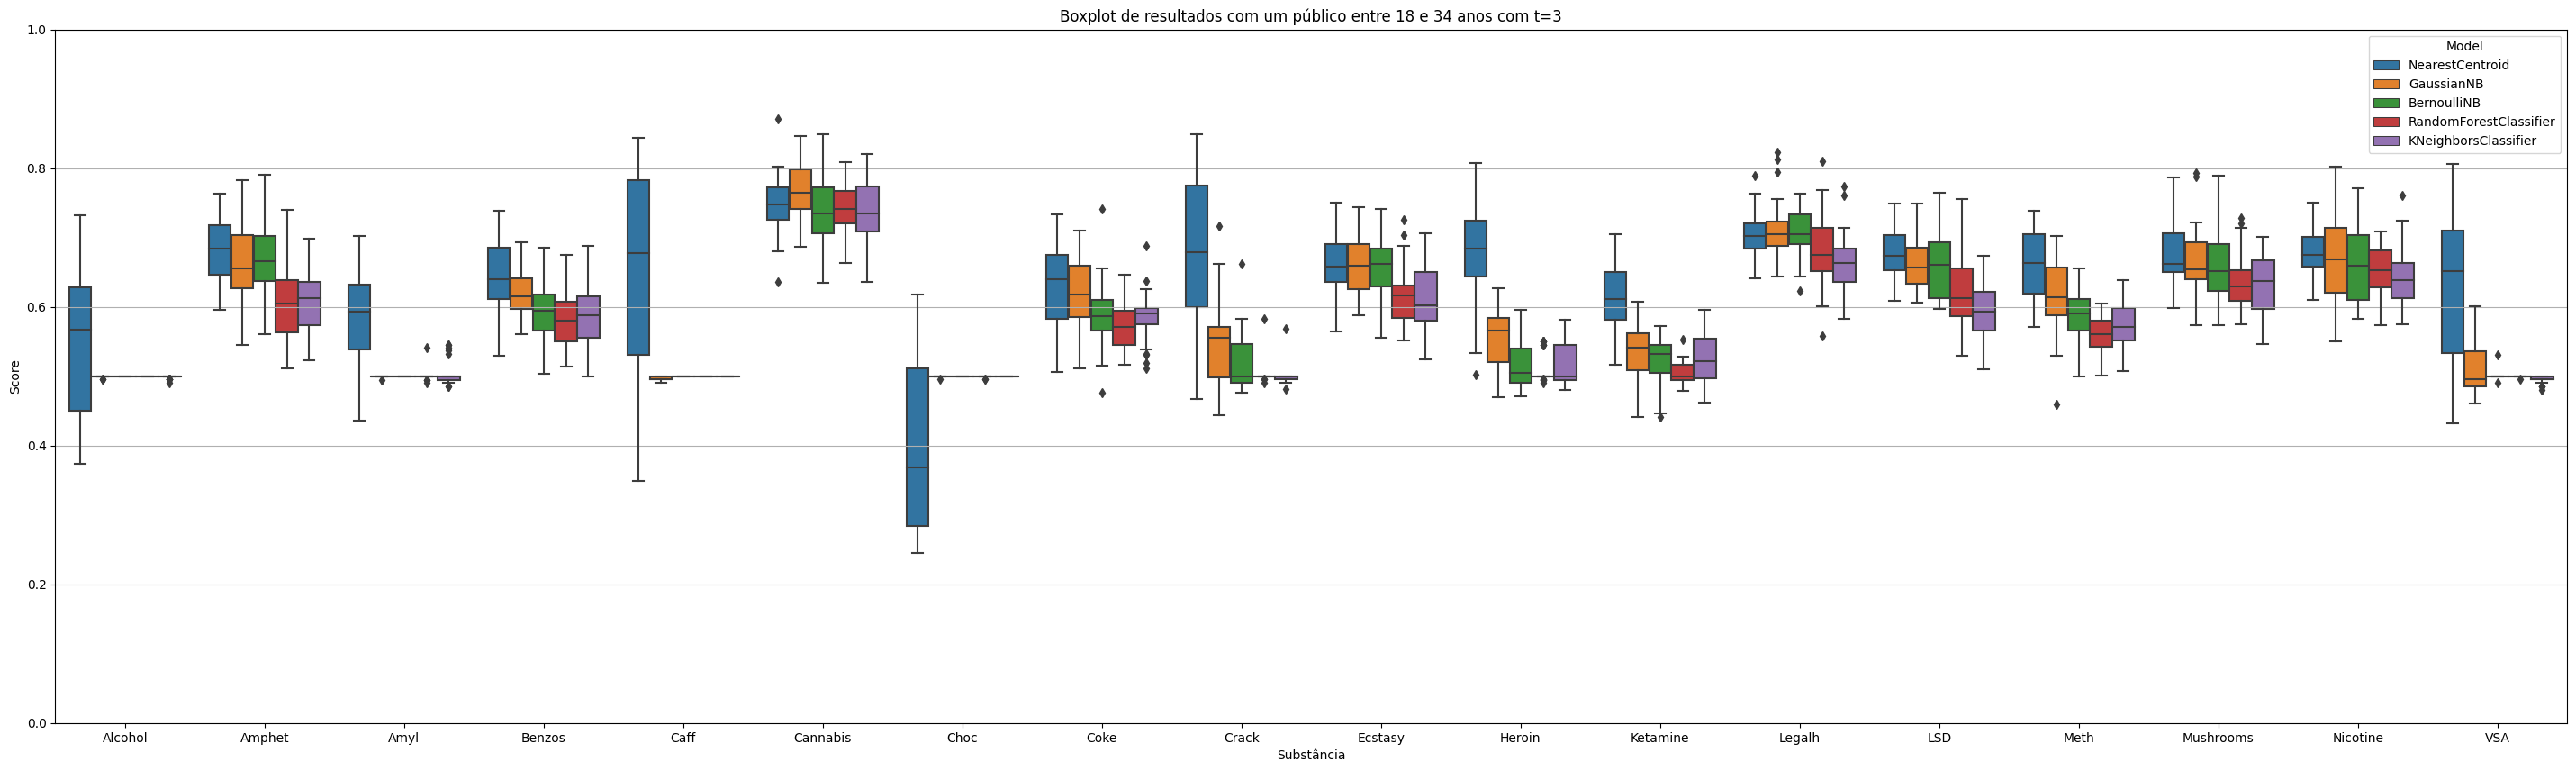

In [214]:
fig = ut.boxplot(
    results_age_range,
    title=f"Boxplot de resultados com um público entre 18 e 34 anos com t={t}",
    lims=(0, 1),
    refs=None,
)
ut.show_statistics(results_age_range)

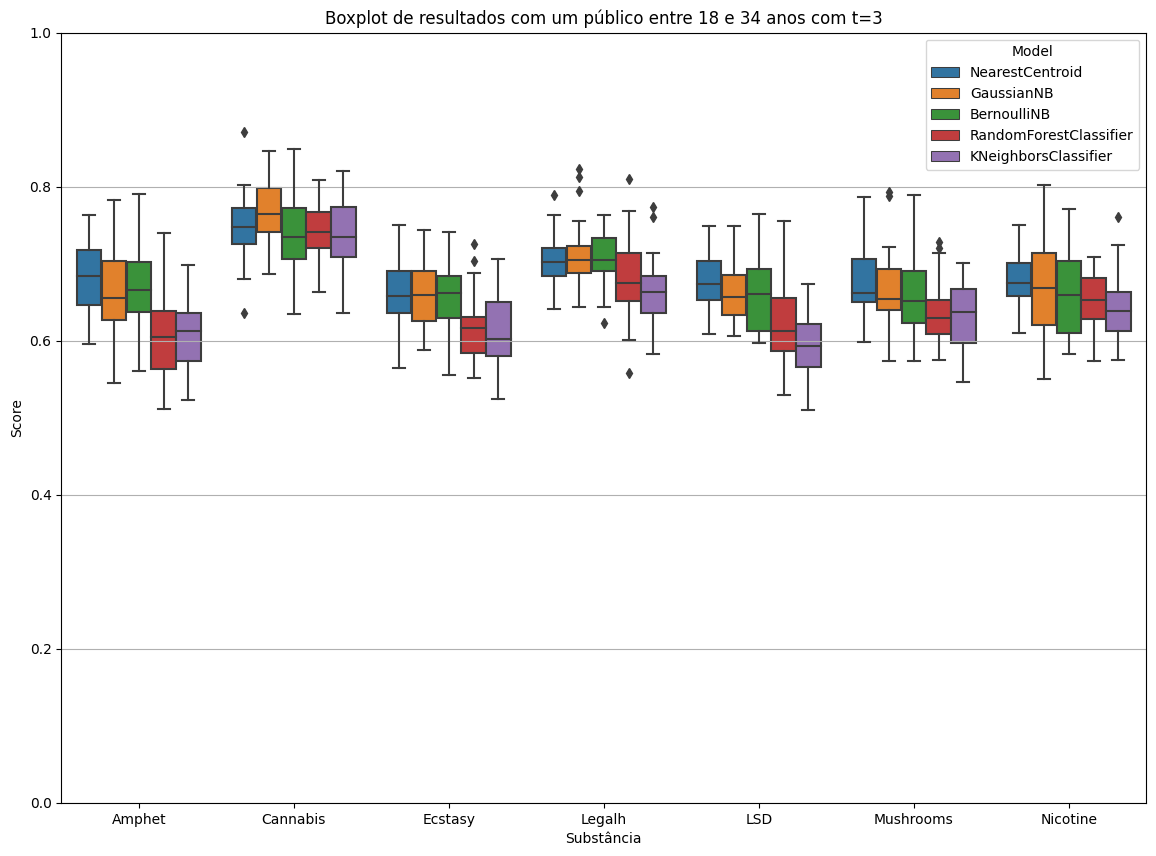

In [215]:
fig = ut.boxplot(
    results_age_range,
    title=f"Boxplot de resultados com um público entre 18 e 34 anos com t={t}",
    substance_filter=ut.best_k,
)
fig.savefig("figures/age_range.svg")

#### Confusion Matrices

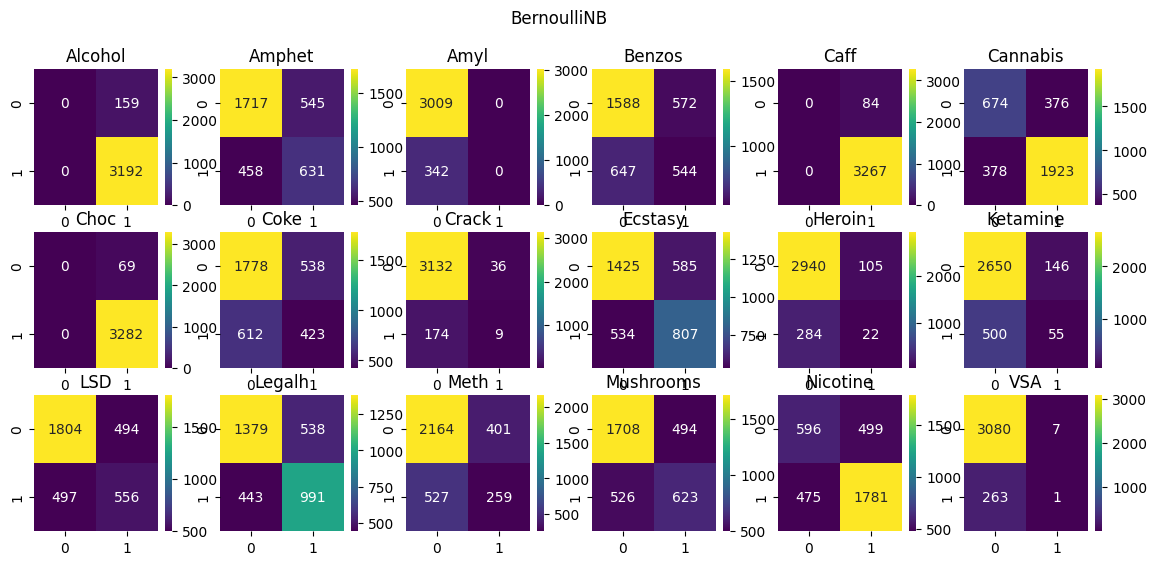

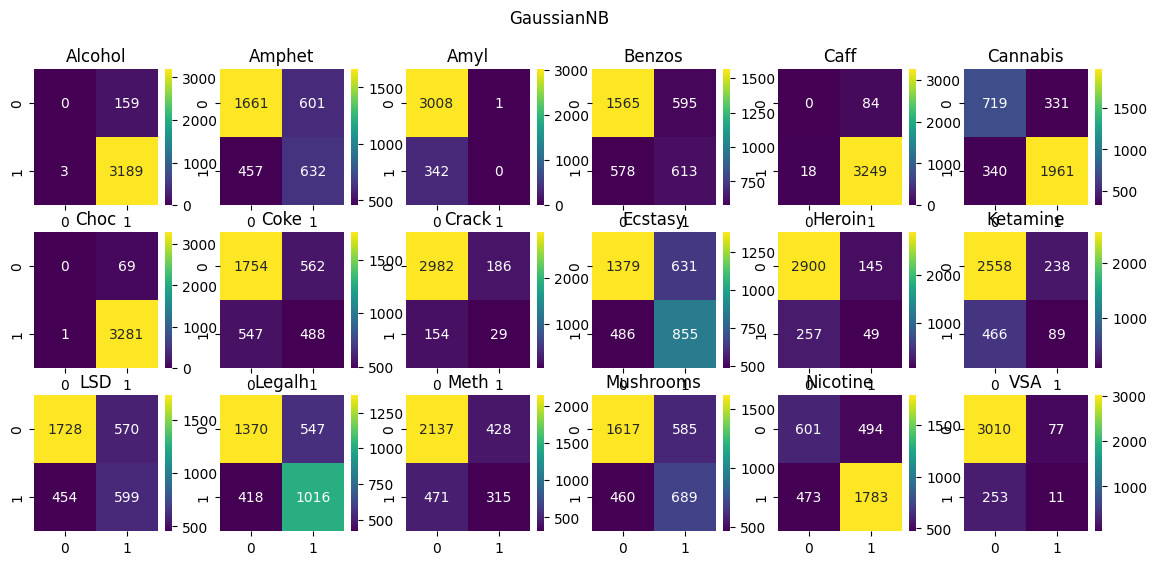

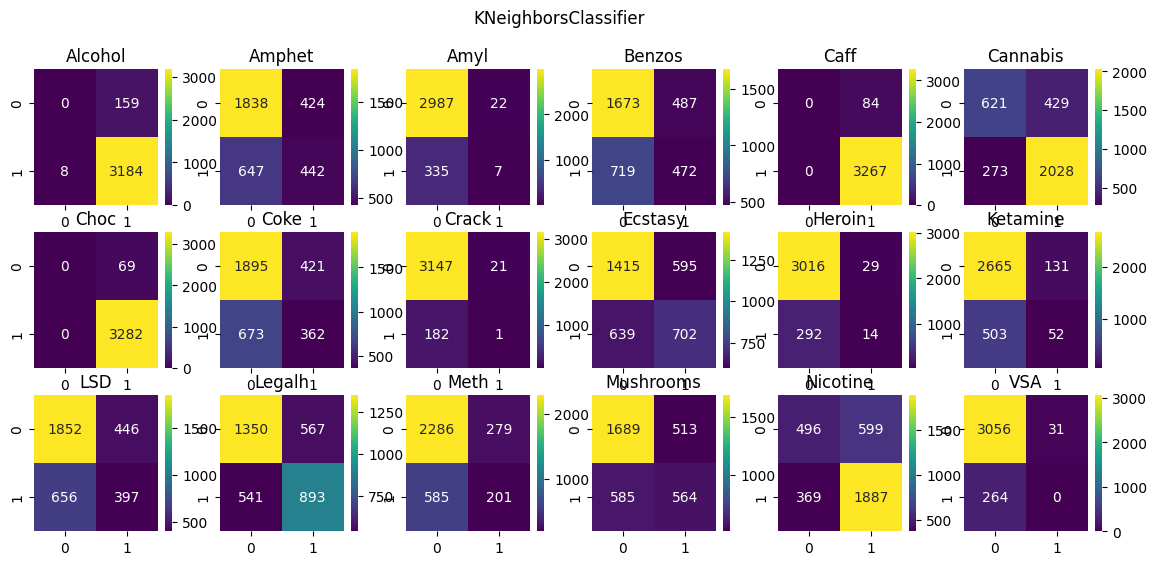

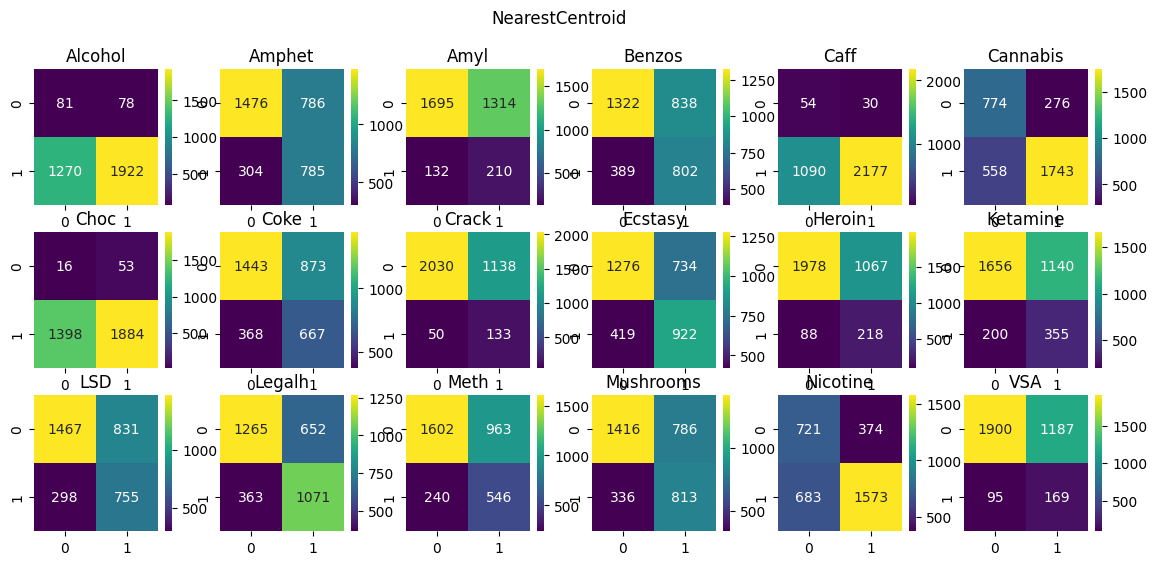

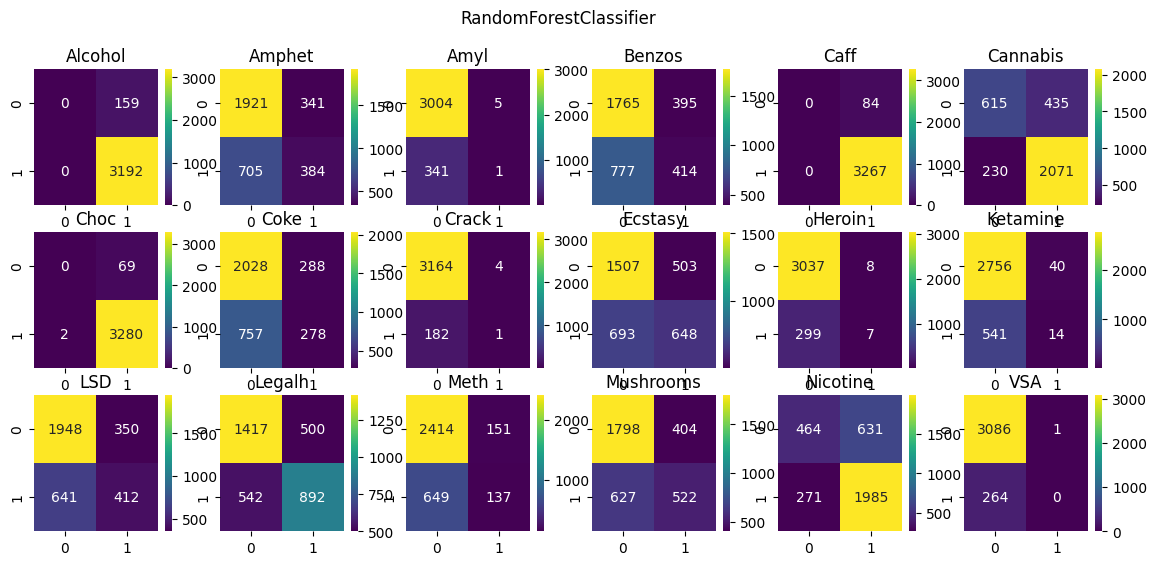

In [216]:
ut.confusion(cm_age_range)

### Análise com PCA
Tentamos aplicar algum tipo de redução de dimensionalidade para observar se há melhorias.

In [217]:
from sklearn.decomposition import PCA

t = 2
pca_comp = 0.95


def pca_run():
    labels = y.applymap(ut.threshold)
    return ut.test_classifiers(
        X, labels, pipe=(ut.metric_preprocessor(), PCA(n_components=pca_comp))
    )


results_pca, cm_pca = ut.run_or_load("results/pca_{a}.csv", pca_run if run else None)

/home/ngmonteiro/llm_experiments/ufes/2024-1-P1-Drug-Consumption/utils.py:325: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.


Substância               Alcohol              Amphet                Amyl  \
                            mean       std      mean       std      mean   
Model                                                                      
BernoulliNB             0.500000  0.000000  0.660619  0.031806  0.500000   
GaussianNB              0.500000  0.000000  0.681631  0.034539  0.499447   
KNeighborsClassifier    0.499632  0.000955  0.647424  0.041823  0.533309   
NearestCentroid         0.631634  0.076609  0.705301  0.034696  0.617843   
RandomForestClassifier  0.499908  0.000504  0.678407  0.037614  0.507482   

Substância                          Benzos                Caff           \
                             std      mean       std      mean      std   
Model                                                                     
BernoulliNB             0.000000  0.635077  0.039777  0.500000  0.00000   
GaussianNB              0.001257  0.655861  0.035529  0.500000  0.00000   
KNeighborsClassifier    0.031428  0.620676  0.028787  0.500000  0.00000   
NearestCentroid         0.048890  0.665150  0.032872  0.691123  0.11308   
RandomForestClassifier  0.013767  0.644744  0.025444  0.500000  0.00000   

Substância              Cannabis                Choc                Coke  \
                            mean       std      mean       std      mean   
Model                                                                      
BernoulliNB             0.736895  0.037597  0.500000  0.000000  0.644170   
GaussianNB              0.756318  0.038386  0.500000  0.000000  0.635838   
KNeighborsClassifier    0.725166  0.039753  0.499819  0.000688  0.633232   
NearestCentroid         0.772601  0.037817  0.479132  0.109793  0.678819   
RandomForestClassifier  0.740676  0.037350  0.500000  0.000000  0.633234   

Substância                           Crack             Ecstasy            \
                             std      mean       std      mean       std   
Model                                                                      
BernoulliNB             0.034641  0.500000  0.000000  0.714141  0.030390   
GaussianNB              0.028758  0.500768  0.006738  0.720665  0.036872   
KNeighborsClassifier    0.033138  0.506246  0.022750  0.679870  0.033774   
NearestCentroid         0.032872  0.657359  0.051476  0.738260  0.030558   
RandomForestClassifier  0.028574  0.501448  0.008585  0.708262  0.037849   

Substância                Heroin            Ketamine                 LSD  \
                            mean       std      mean       std      mean   
Model                                                                      
BernoulliNB             0.500000  0.000000  0.500000  0.000000  0.644822   
GaussianNB              0.505618  0.013461  0.513625  0.018585  0.702423   
KNeighborsClassifier    0.538300  0.034677  0.550252  0.025725  0.669928   
NearestCentroid         0.696747  0.043585  0.673537  0.040668  0.748105   
RandomForestClassifier  0.505908  0.015199  0.515281  0.015031  0.667694   

Substância                          Legalh                Meth            \
                             std      mean       std      mean       std   
Model                                                                      
BernoulliNB             0.030312  0.733658  0.033214  0.505795  0.009514   
GaussianNB              0.038755  0.768922  0.028546  0.566755  0.025992   
KNeighborsClassifier    0.037307  0.747245  0.027048  0.595894  0.033998   
NearestCentroid         0.024003  0.780181  0.030822  0.691104  0.043630   
RandomForestClassifier  0.027368  0.765000  0.030680  0.559835  0.030207   

Substância             Mushrooms            Nicotine                 VSA  \
                            mean       std      mean       std      mean   
Model                                                                      
BernoulliNB             0.696235  0.035559  0.601374  0.038884  0.500000   
GaussianNB              0.716464  0.027335  0.6553

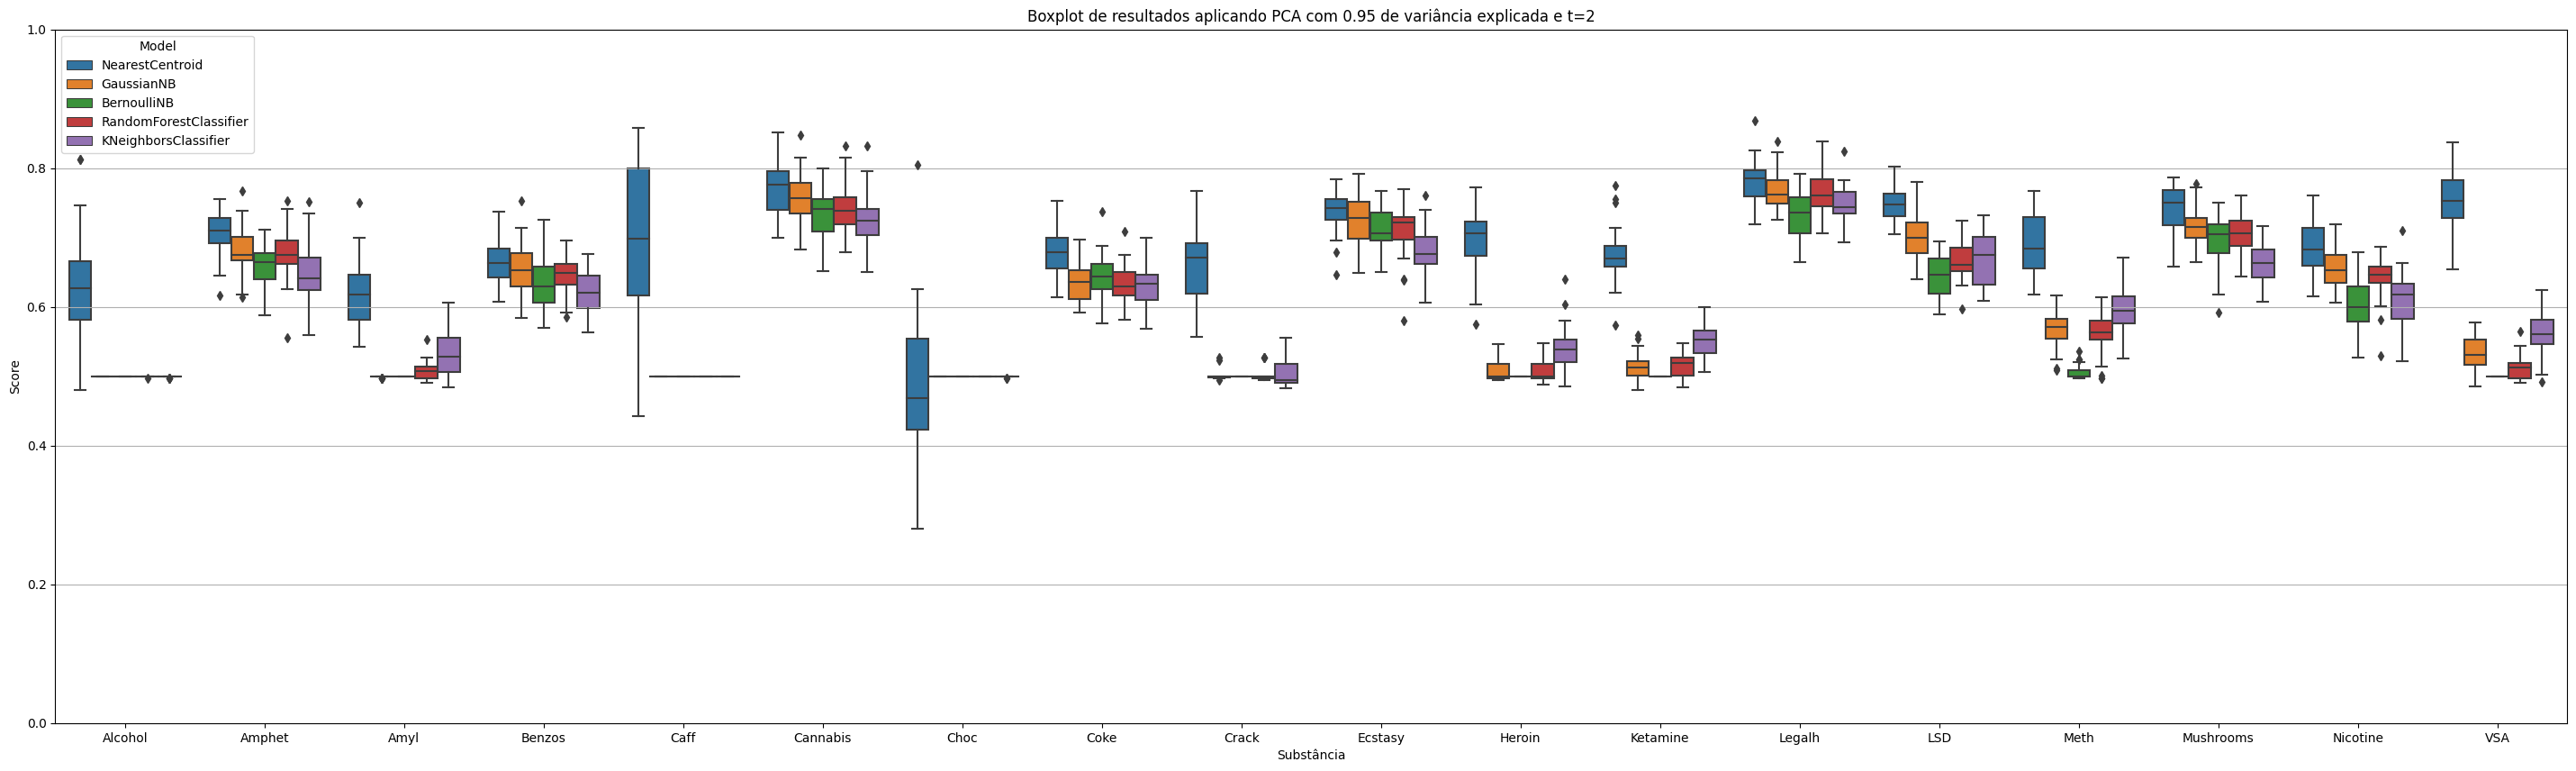

In [218]:
fig = ut.boxplot(
    results_pca,
    title=f"Boxplot de resultados aplicando PCA com {pca_comp} de variância explicada e t={t}",
)
ut.show_statistics(results_pca)

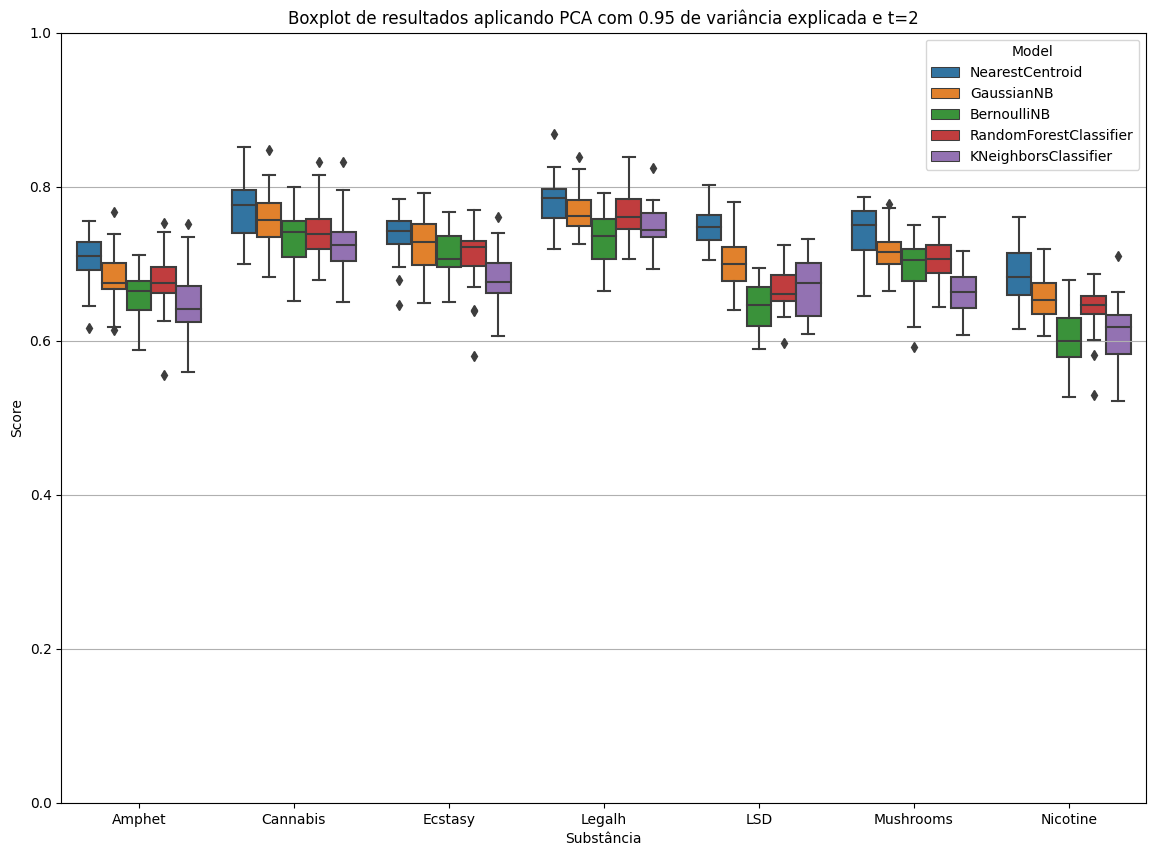

In [219]:
fig = ut.boxplot(
    results_pca,
    title=f"Boxplot de resultados aplicando PCA com {pca_comp} de variância explicada e t={t}",
    substance_filter=ut.best_k,
)
fig.savefig("figures/pca.svg")

#### Confusion Matrices

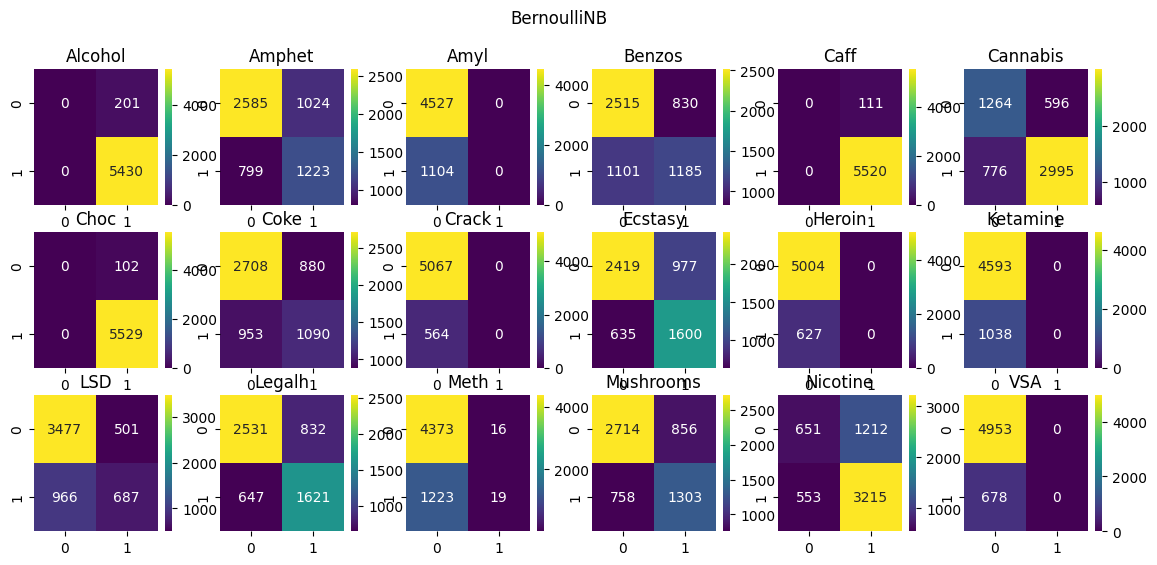

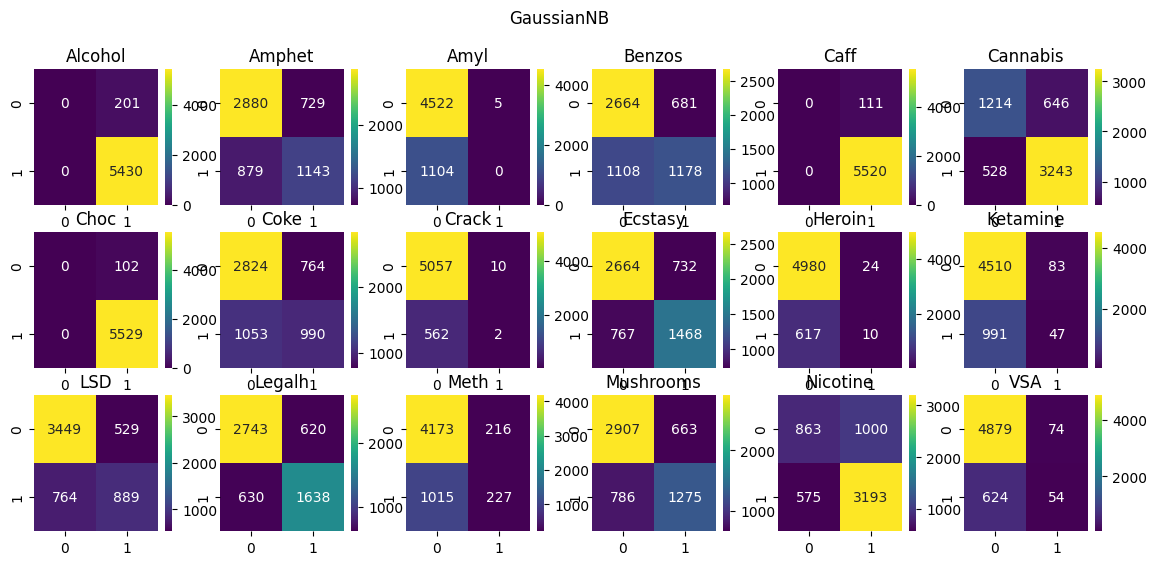

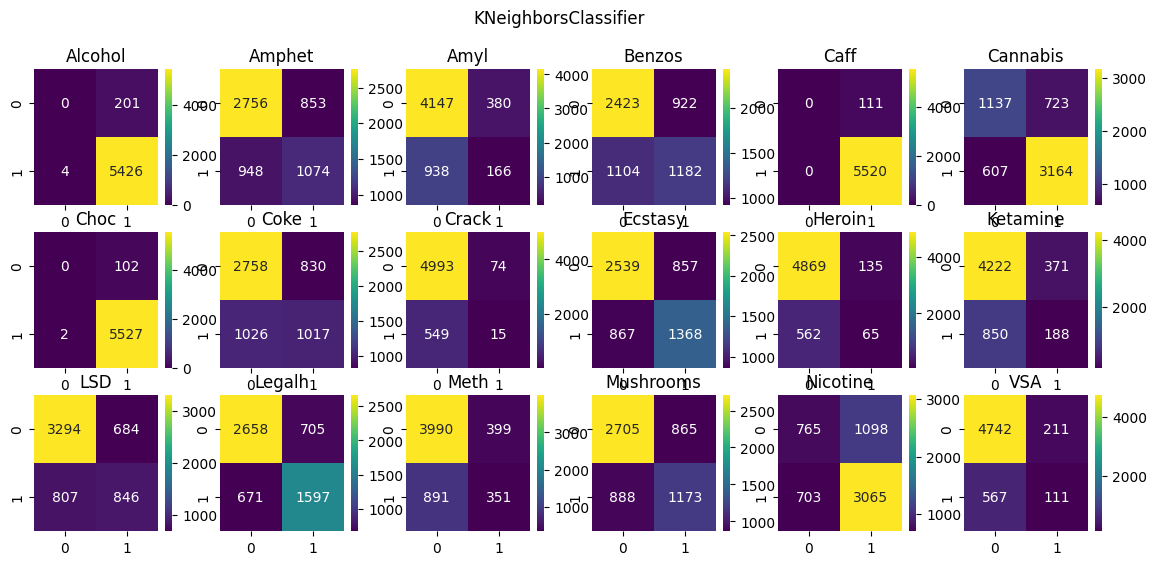

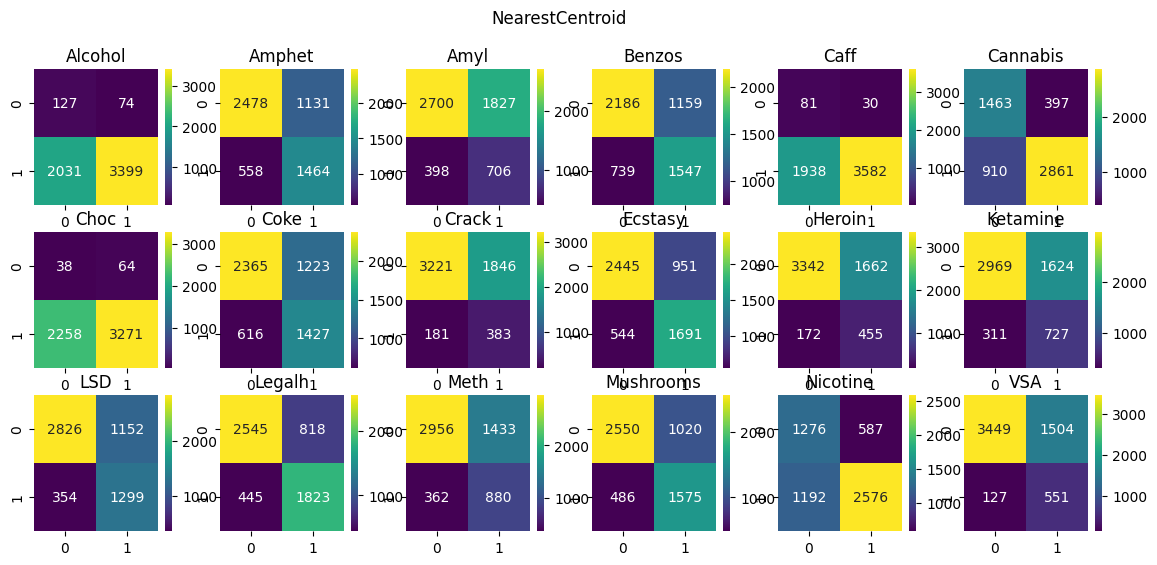

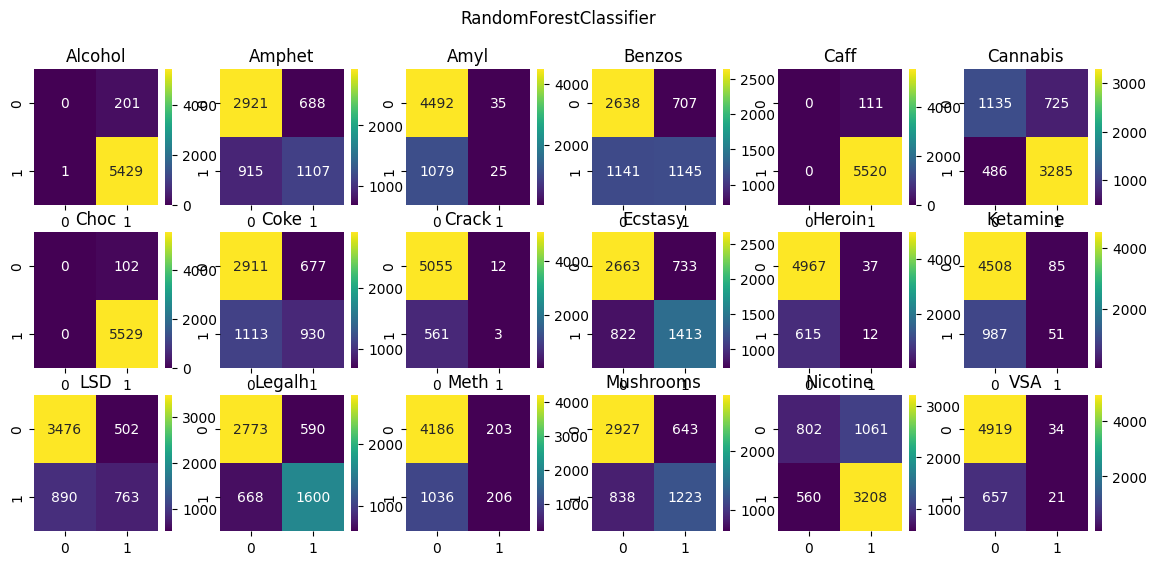

In [220]:
ut.confusion(cm_pca)

## Tratando como Multiclasse
Ao invés de tentar detectar somente dentro de um período de tempo, podemos separar em blocos maiores, de forma que possamos interpretar melhor os resultados.

Ex.: se separarmos entre década, ano e mês, podemos saber separar pessoas que
 - nunca usaram ou experimentaram pouco;
 - pararam de usar recentemente;
 - continuam usando.

In [221]:
t = [2, 4]


def multiclass_run():
    labels = y.applymap(ut.threshold, t=[2, 4])
    return ut.test_classifiers(X, labels)


results_multiclass, cm_multiclass = ut.run_or_load(
    "results/multiclass_{a}.csv", multiclass_run if run else None
)

/home/ngmonteiro/llm_experiments/ufes/2024-1-P1-Drug-Consumption/utils.py:325: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.


Substância               Alcohol              Amphet                Amyl  \
                            mean       std      mean       std      mean   
Model                                                                      
BernoulliNB             0.333333  0.000000  0.447757  0.042831  0.337688   
GaussianNB              0.338533  0.016537  0.478842  0.032213  0.354050   
KNeighborsClassifier    0.333712  0.018515  0.408288  0.025565  0.346095   
NearestCentroid         0.459174  0.060003  0.515489  0.038101  0.466225   
RandomForestClassifier  0.334038  0.005889  0.414423  0.029541  0.339573   

Substância                          Benzos                Caff            \
                             std      mean       std      mean       std   
Model                                                                      
BernoulliNB             0.010173  0.434296  0.031636  0.333333  0.000000   
GaussianNB              0.029465  0.456816  0.040614  0.333017  0.000720   
KNeighborsClassifier    0.018964  0.407313  0.033530  0.341896  0.028562   
NearestCentroid         0.080669  0.484233  0.041433  0.484576  0.090993   
RandomForestClassifier  0.011903  0.403900  0.031760  0.333270  0.000346   

Substância              Cannabis                Choc                Coke  \
                            mean       std      mean       std      mean   
Model                                                                      
BernoulliNB             0.561577  0.025673  0.333333  0.000000  0.420285   
GaussianNB              0.567475  0.027334  0.333333  0.000000  0.432818   
KNeighborsClassifier    0.554669  0.024025  0.332834  0.000975  0.391378   
NearestCentroid         0.588309  0.025133  0.327585  0.126333  0.509803   
RandomForestClassifier  0.567643  0.032695  0.333333  0.000000  0.398028   

Substância                           Crack             Ecstasy            \
                             std      mean       std      mean       std   
Model                                                                      
BernoulliNB             0.025700  0.367591  0.022054  0.486727  0.033934   
GaussianNB              0.036157  0.369218  0.029527  0.511242  0.043522   
KNeighborsClassifier    0.031719  0.335735  0.012636  0.423763  0.027125   
NearestCentroid         0.052356  0.501894  0.126908  0.537892  0.043189   
RandomForestClassifier  0.033456  0.336466  0.007612  0.458527  0.031947   

Substância                Heroin            Ketamine                 LSD  \
                            mean       std      mean       std      mean   
Model                                                                      
BernoulliNB             0.365989  0.035522  0.372189  0.029805  0.474672   
GaussianNB              0.414523  0.059730  0.401371  0.052166  0.505054   
KNeighborsClassifier    0.348786  0.020907  0.363273  0.031978  0.415012   
NearestCentroid         0.527808  0.067232  0.499541  0.065501  0.543400   
RandomForestClassifier  0.338030  0.011363  0.345674  0.016326  0.428038   

Substância                          Legalh                Meth            \
                             std      mean       std      mean       std   
Model                                                                      
BernoulliNB             0.046220  0.505743  0.035123  0.389701  0.036032   
GaussianNB              0.048201  0.531965  0.037240  0.446852  0.036488   
KNeighborsClassifier    0.038989  0.472515  0.030277  0.381756  0.024631   
NearestCentroid         0.040640  0.562941  0.035216  0.477698  0.053444   
RandomForestClassifier  0.029260  0.496032  0.028833  0.366056  0.023358   

Substância             Mushrooms            Nicotine                 VSA  \
                            mean       std      mean       std      mean   
Model                                                                      
BernoulliNB             0.449742  0.031671  0.467595  0.021344  0.411317   
GaussianNB              0.492158  0.039647

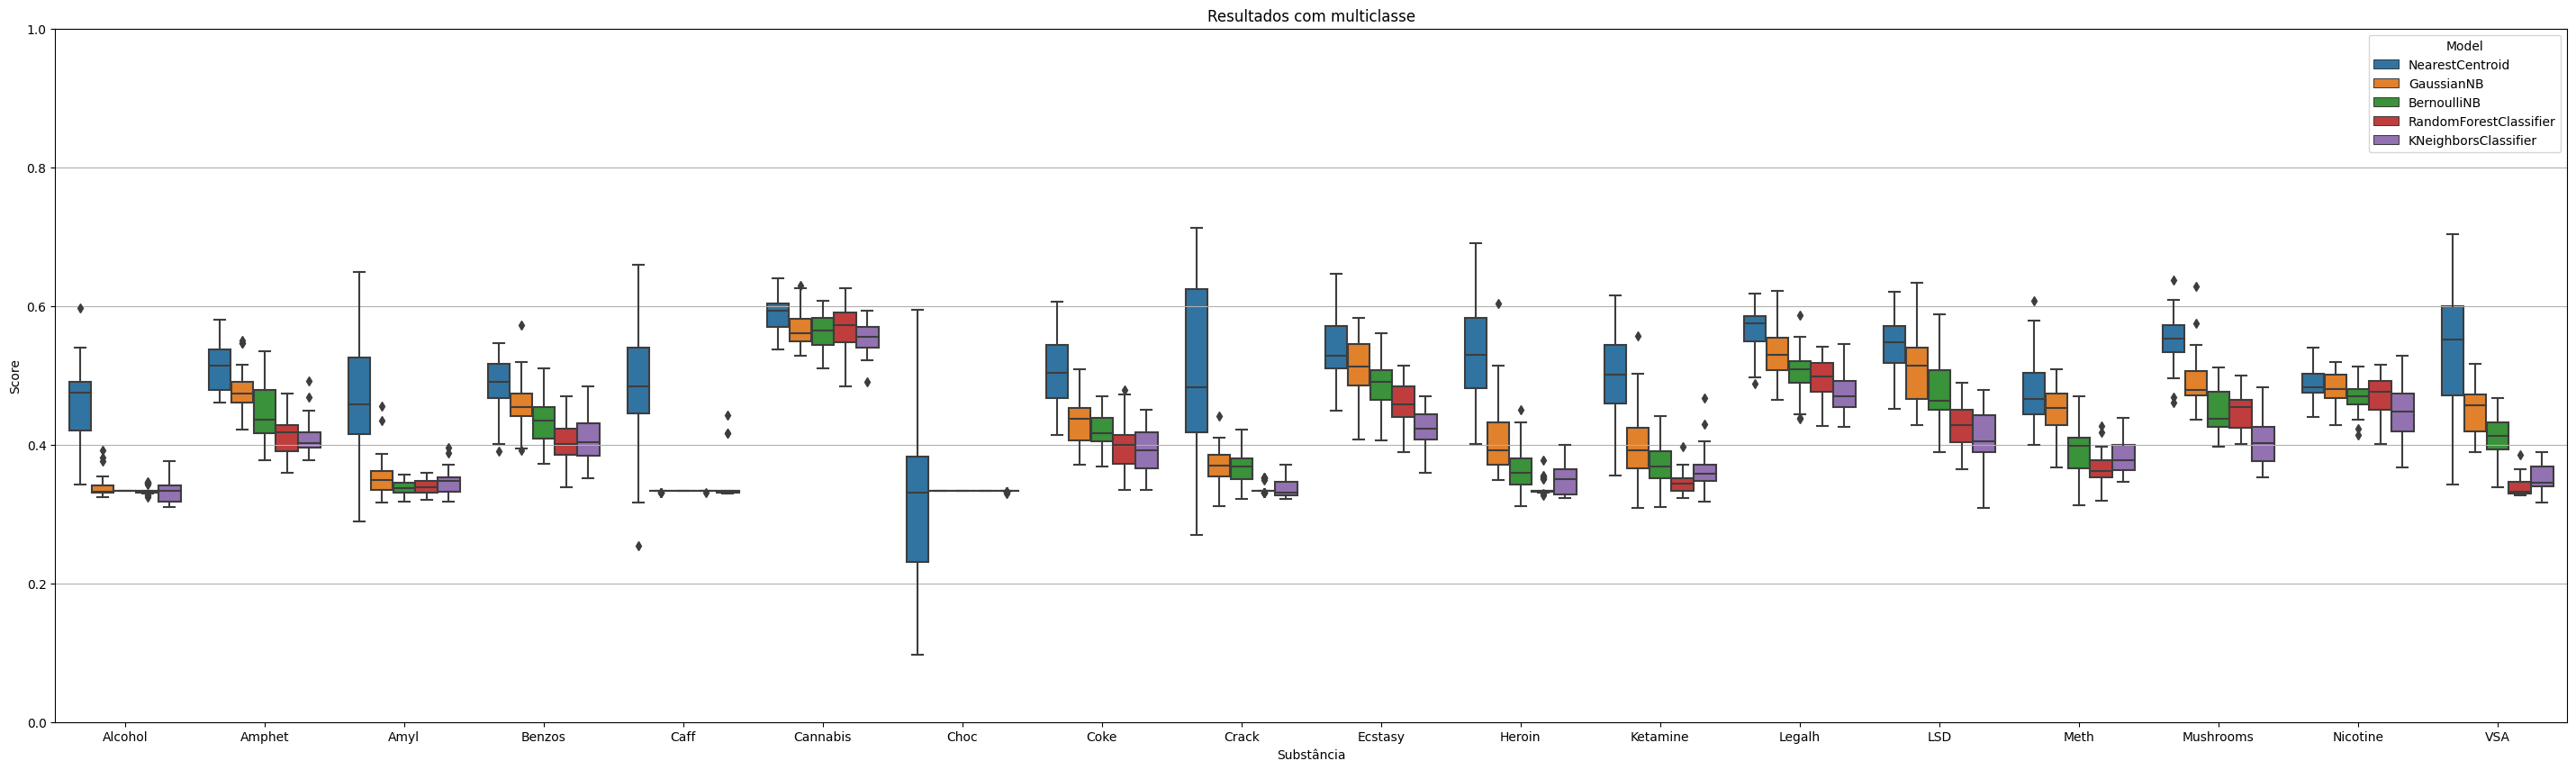

In [222]:
fig = ut.boxplot(results_multiclass, f"Resultados com multiclasse")
ut.show_statistics(results_multiclass)

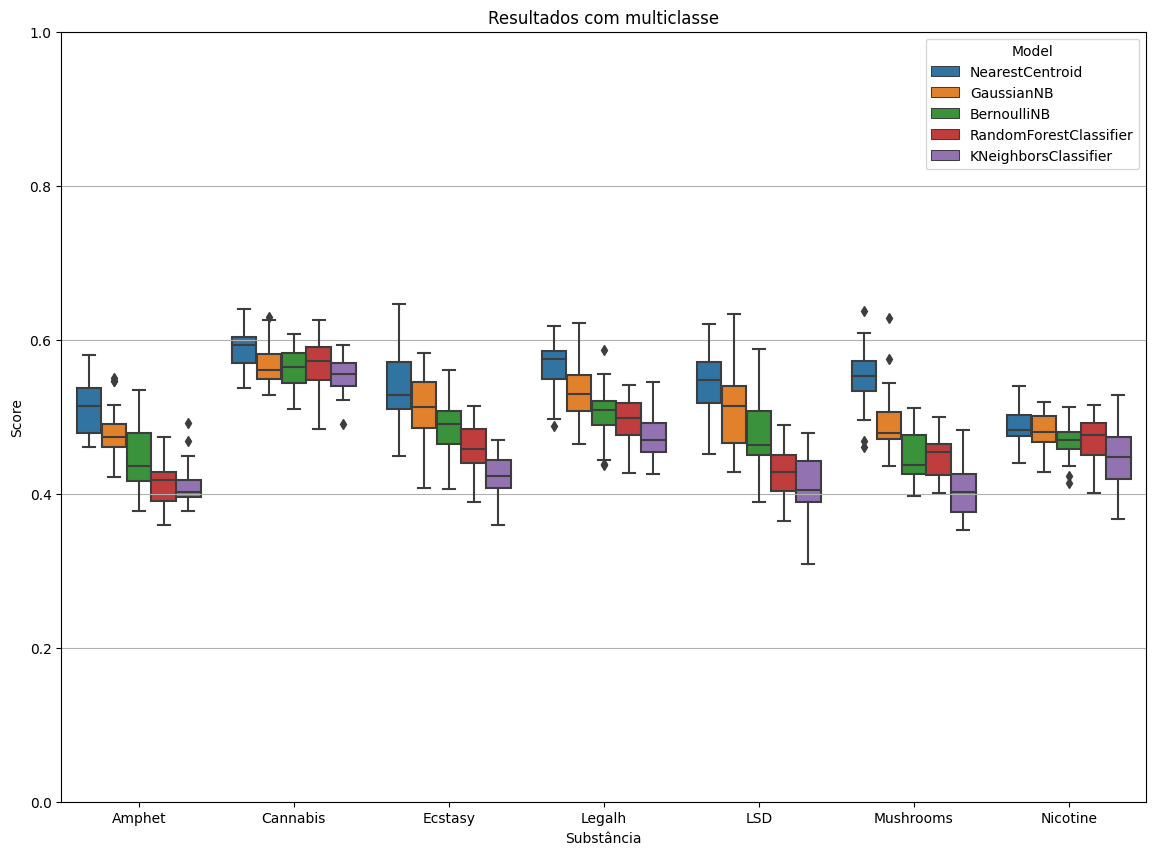

In [223]:
fig = ut.boxplot(
    results_multiclass,
    f"Resultados com multiclasse",
    substance_filter=ut.best_k,
)
fig.savefig("figures/multiclass.svg")

### Confusion Matrices

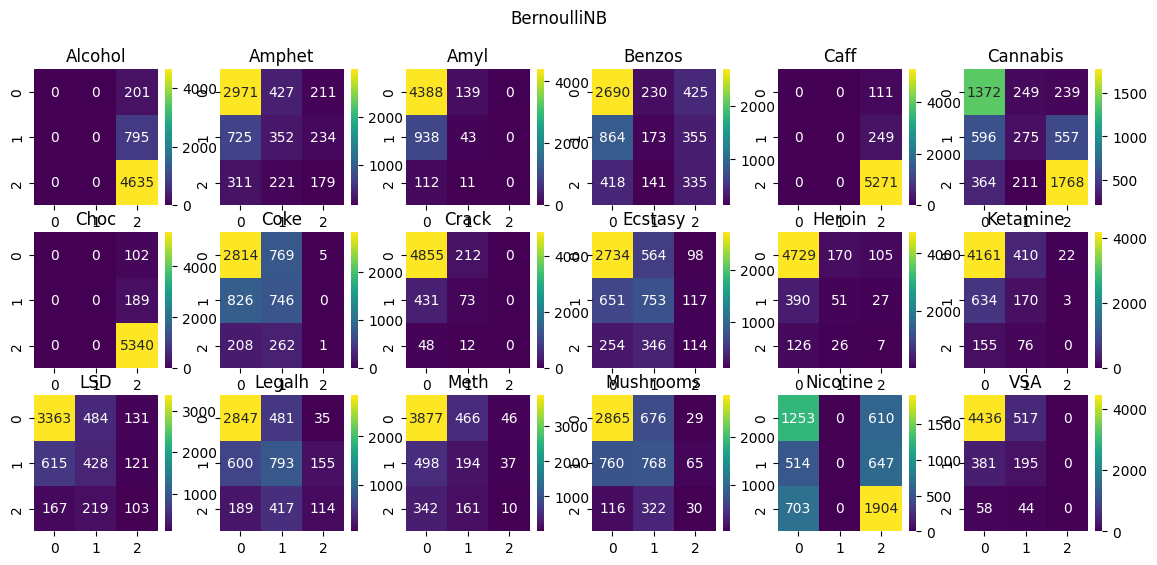

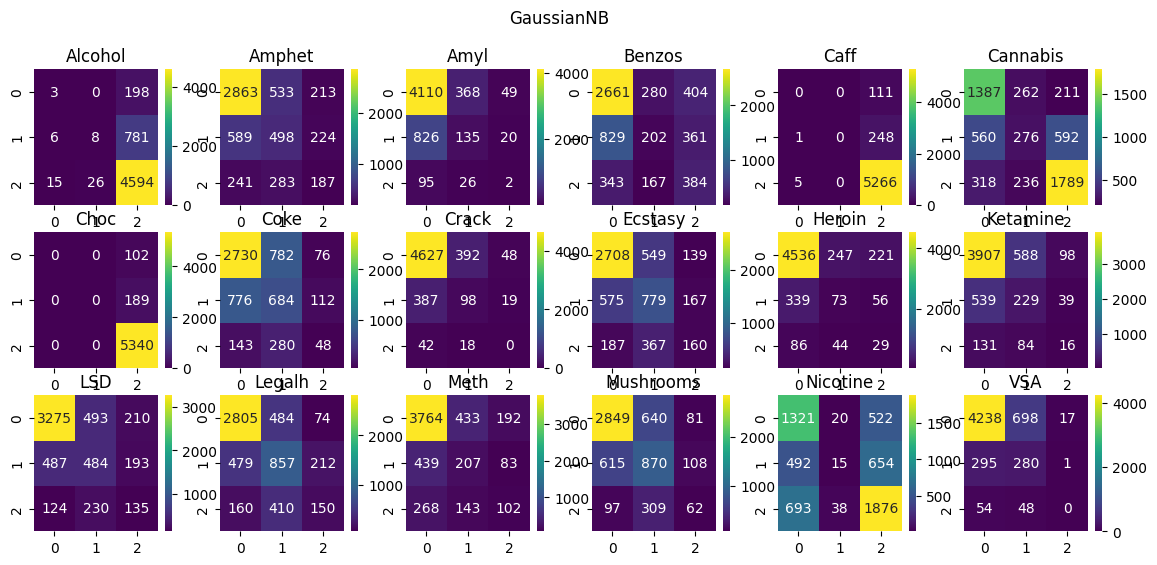

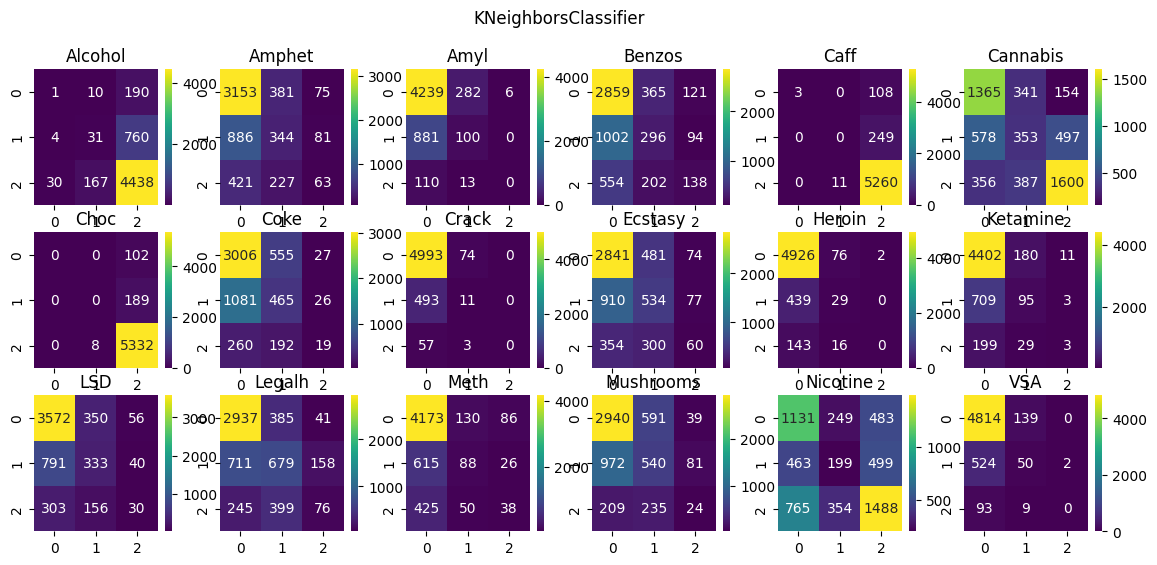

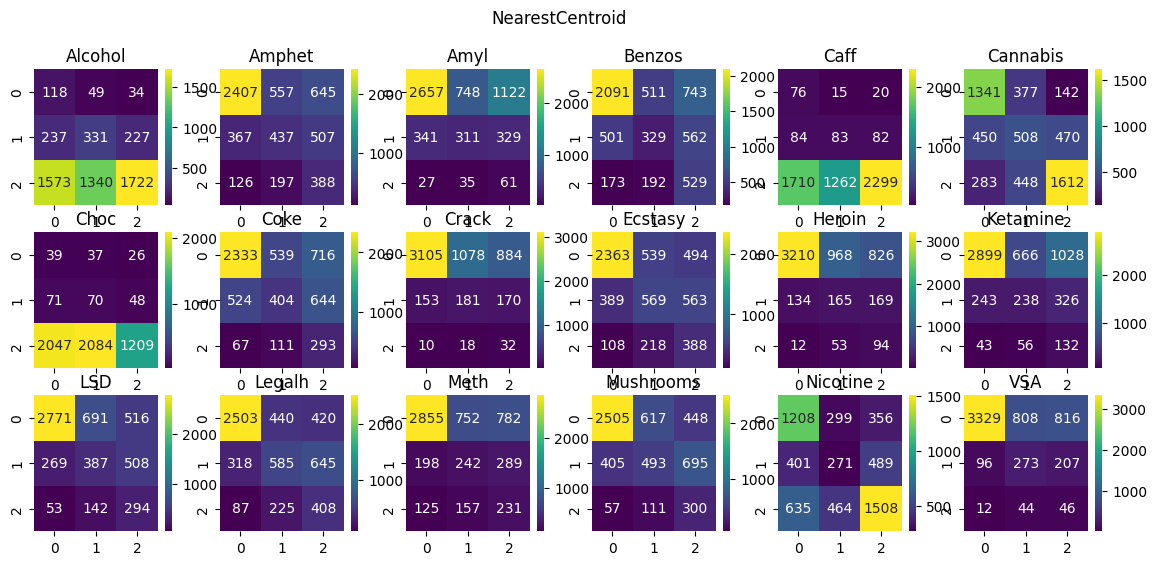

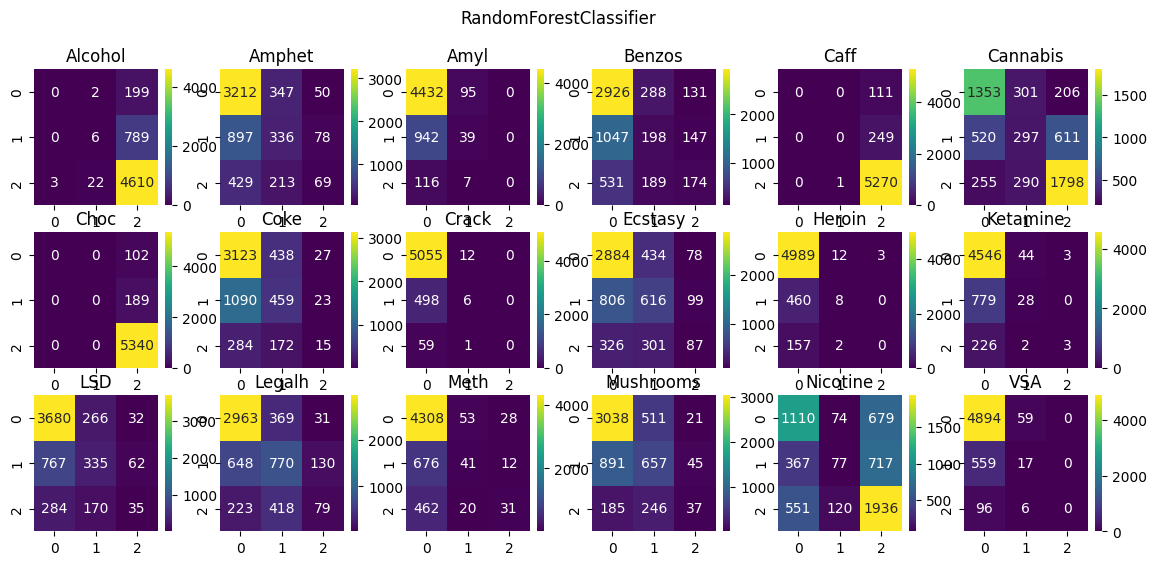

In [224]:
ut.confusion(cm_multiclass)